# Written test: 

#### Position Number 00136268
#### Position Title: Coop Level 2 - Data Scientist
#### Classification: Coop Level 2

### Step 1: Import data and libraries
Imported the provided dataset in Python using Pandas library and needed libraries.

In [1]:
# Import needed libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


# NLTK tools for text processing
import nltk 
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import FreqDist
from wordcloud import WordCloud

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Libraries for topic modeling
from gensim import corpora
from gensim.models import CoherenceModel, LdaMulticore

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/xxxibdara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/xxxibdara/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/xxxibdara/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/xxxibdara/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
# Read the data
df = pd.read_excel('Sample Data for Text Analysis.xlsx')
print("Number of comments: ",len(df['text']))

df.head()

Number of comments:  2838


,post_id,text
0,1,"He said he had not felt that way before, sugge..."
1,2,"Hey there r/assistance, Not sure if this is th..."
2,3,My mom then hit me with the newspaper and it s...
3,4,"until i met my new boyfriend, he is amazing, h..."
4,5,October is Domestic Violence Awareness Month a...


## Step 2: Tidy the dataset
Basically, I removed irrelevant columns and cleaned the data by removing stop words, punctuation, and converting all the text into lower case to make it uniform for analysis.

In [3]:
# Clean the data by removing all punctuation, numbers, and new lines
# Coverting all text to lowercase for consistency
def data_cleaning(df):
    df.dropna(inplace=True)
    df.drop_duplicates(subset=['text'], inplace=True)
    df.reset_index(drop=True, inplace=True)
    df['text'] = df['text'].str.lower()
    df['text'] = df['text'].replace('[^\w\s]','', regex=True)
    df['text'] = df['text'].replace('\d+', '', regex=True)
    df['text'] = df['text'].replace('\n', '', regex=True)

    return df
data_cleaning(df)
print("Number of comments after cleaning: ",len(df))

Number of comments after cleaning:  2819


For safe measure, let's add some stopwords. It's a comment corpus, so it is likely we will be coming across variations of 'dont', 'ive', and 'cant'... which will not really add any value to the topic models.

In [4]:
import re
# Tokenize the text
filtered_list = []
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
my_stop_words = ['wmu', 'wa', 'ha', 'ive', 'thing', 'go', 'like', 'get', 'feel', 'url', 'something', 'try', 'dont', 'cant', 'wasnt', 'havent', 'wont', 'couldnt', 'lot', 'didnt', 'doesnt']
stop_words = set(stopwords.words('english')) | set(my_stop_words)

# Filter the tokens
def preprocess_text(text):
    only_letters = re.sub('[^a-zA-Z]', ' ', text) 
    words = word_tokenize(only_letters)
    tokens = [word for word in words if (word not in stop_words)]
    lemmatized_tokens = [lemmatizer.lemmatize(t) for t in tokens if len(t)>2]
    
    return lemmatized_tokens

df['tokens'] = df['text'].apply(preprocess_text)
filtered_list = df['tokens'].sum()
df.head()

,post_id,text,tokens
0,1,he said he had not felt that way before sugget...,"[said, felt, way, suggeted, rest, trigger, ahe..."
1,2,hey there rassistance not sure if this is the ...,"[hey, rassistance, sure, right, place, post, g..."
2,3,my mom then hit me with the newspaper and it s...,"[mom, hit, newspaper, shocked, would, know, pl..."
3,4,until i met my new boyfriend he is amazing he ...,"[met, new, boyfriend, amazing, kind, sweet, go..."
4,5,october is domestic violence awareness month a...,"[october, domestic, violence, awareness, month..."


In [5]:
# Create part of speech tags for each token
tagged = nltk.pos_tag(filtered_list)

# Filter the tokens to only include 'NN', 'JJ' tags
filtered_tokens = [word for word, tag in tagged if tag in ('NN', 'JJ')]
df['filtered_tokens'] = df['tokens'].apply(lambda x: [item for item in x if item in filtered_tokens])
df.head()

,post_id,text,tokens,filtered_tokens
0,1,he said he had not felt that way before sugget...,"[said, felt, way, suggeted, rest, trigger, ahe...","[felt, way, rest, trigger, youire, hypocondria..."
1,2,hey there rassistance not sure if this is the ...,"[hey, rassistance, sure, right, place, post, g...","[hey, rassistance, sure, right, place, post, g..."
2,3,my mom then hit me with the newspaper and it s...,"[mom, hit, newspaper, shocked, would, know, pl...","[mom, hit, newspaper, shocked, know, play, hit..."
3,4,until i met my new boyfriend he is amazing he ...,"[met, new, boyfriend, amazing, kind, sweet, go...","[met, new, boyfriend, amazing, kind, sweet, go..."
4,5,october is domestic violence awareness month a...,"[october, domestic, violence, awareness, month...","[october, domestic, violence, awareness, month..."


#### Step 2.1: Visualization
Create the word cloud and frequency distribution for the TOP 30 most common words in the subreddits posts.

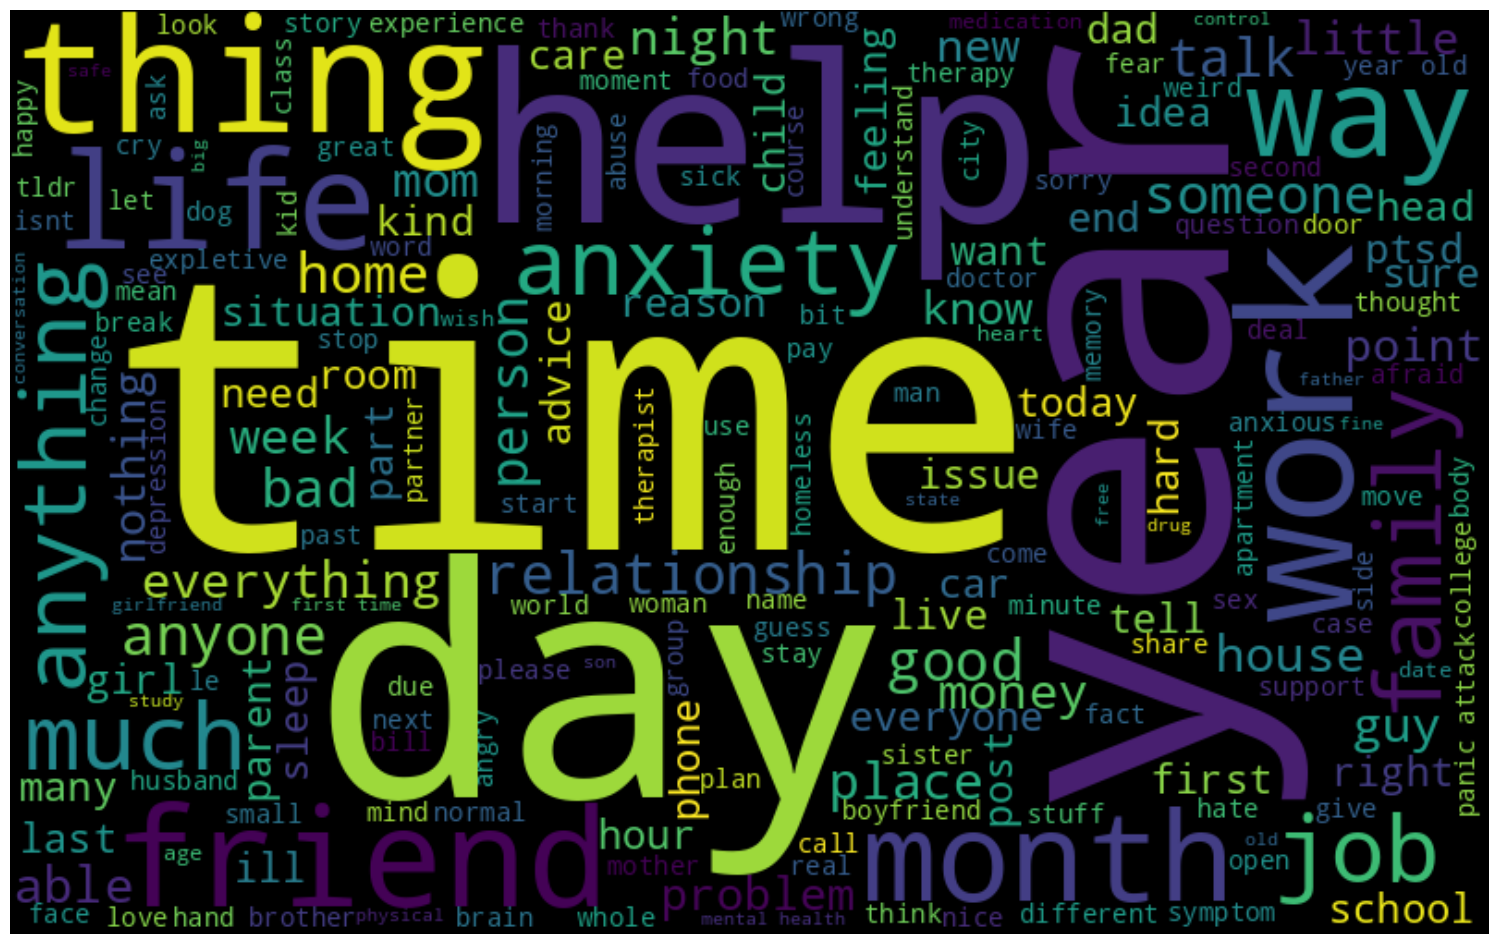

In [6]:
# Create a wordcloud
unique_string=(' ').join(filtered_tokens)
wordcloud = WordCloud(width = 800, height = 500).generate(unique_string)
plt.figure(figsize=(20,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The most common words are: ['time' 'year' 'day' 'help' 'friend' 'life' 'thing' 'work' 'month'
 'anxiety' 'way' 'job' 'family' 'relationship' 'anyone' 'much' 'week'
 'anything' 'good' 'last' 'someone' 'home' 'bad' 'night' 'person' 'talk'
 'everything' 'place' 'money' 'able']


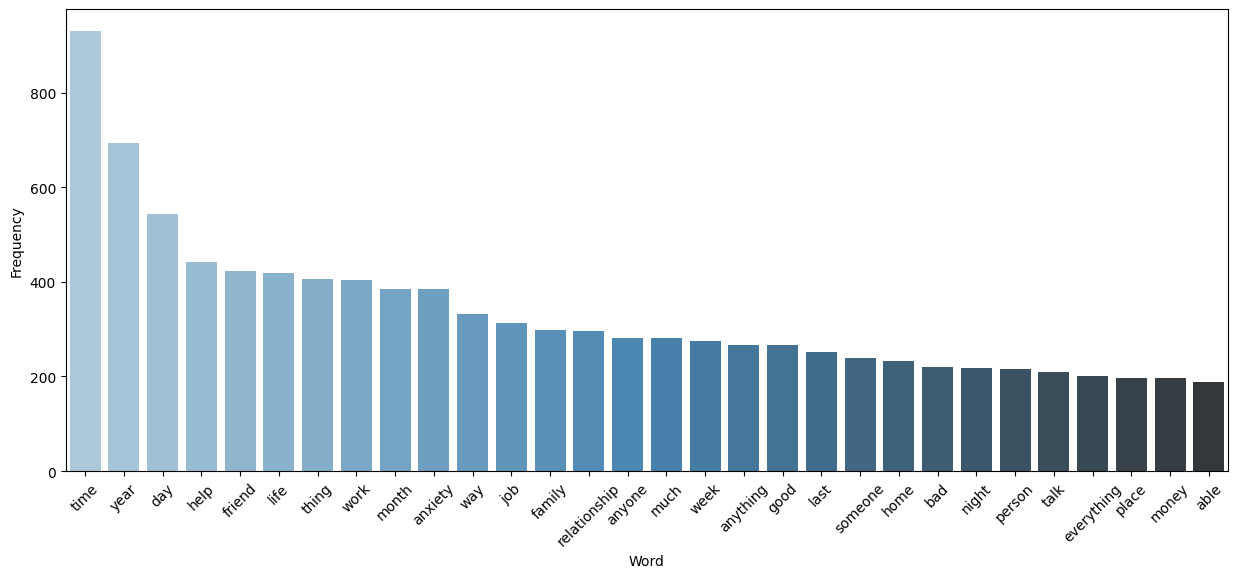

In [7]:
# Find the most common words
# Create a frequency distribution

fdist = FreqDist(filtered_tokens)
commonWords = fdist.most_common(30)
dist = pd.DataFrame(commonWords, columns=['Word', 'Frequency'])

fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(x='Word', y='Frequency', data=dist, palette='Blues_d')
plt.xticks(rotation=45)


print(f"The most common words are: {dist['Word'].values}")

In [8]:
# Find the most common stemmed words
# stemmer = PorterStemmer()

# # Stem the tokens
# stemmed_tokens = [stemmer.stem(t) for t in filtered_tokens]

# stemmed_fdist = FreqDist(stemmed_tokens)
# stemmed_commonWords = stemmed_fdist.most_common(30)
# stemmed_dist = pd.DataFrame(stemmed_commonWords, columns=['Stemmed Word', 'Frequency'])

# fig, ax = plt.subplots(figsize=(15,6))
# sns.barplot(x='Stemmed Word', y='Frequency', data=stemmed_dist, palette='Blues_d')
# plt.xticks(rotation=45)

# print(f"The most common stemmed words are: {stemmed_dist['Stemmed Word'].values}")

### Step 3: Develop themes or topics
We need to first initial a dictionary, which is a list of unique tokens in our documents (i.e. all comments). Then, we need to convert our documents to bags of words, which is referred to as corpus in gensim. Corpus is an object that contains token id and its frequency in each document.

In [9]:
# Create a dictionary of tokens, where each word is assigned a unique integer id
dictionary = corpora.Dictionary(df['filtered_tokens'])

# Create a bow of words for each document (list of tuples)
bow_corpus = [dictionary.doc2bow(doc) for doc in df['filtered_tokens']]

In [10]:
# # Compute coherence score for each number of topics
# topics = []
# coherence_scores = []

# for num in range(1, 7, 1):
#     lda = LdaMulticore(bow_corpus, num_topics=num, id2word=dictionary, passes=10, workers=4)
#     coherence_model = CoherenceModel(model=lda, 
#                                      texts=df['filtered_tokens'],
#                                      dictionary=dictionary,
#                                      coherence='c_v')
#     score = coherence_model.get_coherence()
#     topics.append(num)
#     coherence_scores.append(score)

# # Plot the coherence scores
# plt.figure(figsize=(10,6))
# plt.plot(topics, coherence_scores)
# plt.xlabel("Number of Topics")
# plt.ylabel("Coherence Score")
# plt.title("Coherence Scores for Different Number of Topics")
# plt.show()

In [11]:
# Topic modeling 
# n_topics = np.argmax(coherence_scores) + 1
n_topics = 4

lda_model = LdaMulticore(bow_corpus, num_topics=n_topics, id2word=dictionary, passes=10, workers=4)


# Show first n important word in the topics:
lda_model.show_topics(n_topics, num_words=10)

[(0,
  '0.014*"time" + 0.013*"year" + 0.009*"day" + 0.008*"even" + 0.008*"month" + 0.008*"one" + 0.007*"thing" + 0.006*"back" + 0.006*"relationship" + 0.006*"want"'),
 (1,
  '0.013*"know" + 0.008*"day" + 0.008*"want" + 0.007*"work" + 0.007*"need" + 0.006*"job" + 0.006*"way" + 0.006*"back" + 0.005*"see" + 0.005*"got"'),
 (2,
  '0.012*"know" + 0.012*"friend" + 0.011*"year" + 0.010*"time" + 0.008*"want" + 0.008*"even" + 0.007*"think" + 0.007*"one" + 0.006*"thing" + 0.005*"help"'),
 (3,
  '0.013*"time" + 0.012*"help" + 0.009*"know" + 0.009*"anxiety" + 0.007*"one" + 0.007*"even" + 0.007*"want" + 0.006*"need" + 0.006*"work" + 0.006*"make"')]

In [12]:
# Eliminate words with extreme frequencies
# Only keep tokens that appear in at least 5 documents, and no more than 20% of the documents

dictionary.filter_extremes(no_below=5, no_above=0.1, keep_n=100000)
corpus = [dictionary.doc2bow(doc) for doc in df['filtered_tokens']]
model = LdaMulticore(corpus, num_topics=n_topics, id2word=dictionary, passes=10, workers=4)
model.show_topics(n_topics, 10)

[(0,
  '0.011*"job" + 0.007*"take" + 0.006*"expletive" + 0.006*"thought" + 0.006*"family" + 0.005*"money" + 0.005*"come" + 0.005*"new" + 0.005*"someone" + 0.005*"good"'),
 (1,
  '0.013*"relationship" + 0.010*"feeling" + 0.008*"anyone" + 0.008*"love" + 0.008*"see" + 0.007*"someone" + 0.006*"good" + 0.006*"tell" + 0.006*"thought" + 0.006*"say"'),
 (2,
  '0.008*"money" + 0.007*"week" + 0.007*"family" + 0.006*"therapy" + 0.006*"house" + 0.006*"well" + 0.006*"first" + 0.005*"last" + 0.005*"school" + 0.005*"take"'),
 (3,
  '0.009*"told" + 0.008*"night" + 0.007*"home" + 0.006*"week" + 0.005*"sleep" + 0.005*"bad" + 0.005*"come" + 0.005*"talk" + 0.005*"phone" + 0.005*"started"')]

#### Assign the topics to each document and find the dominant topic in each document

In [13]:
# Find the dominant topic in each document
def dominant_topic(text, model, corpus):
    topic = []
    for i in range(len(text)):
        idx, score = max(model[corpus[i]], key=lambda tup: tup[1])
        topic.append(idx)
    return topic

df['topic'] = dominant_topic(df['filtered_tokens'], model, corpus)

### Step 4: Visualize the LDA model results
We use pyLDAvis to visualize the results.

In [14]:
# Import and enable interactive visualization
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim_models.prepare(model, corpus, dictionary, sort_topics=False)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.012459 -0.063741       1        1  23.944990
1     -0.070560 -0.030516       2        1  30.142822
2      0.092135  0.014653       3        1  18.258283
3     -0.034034  0.079603       4        1  27.653906, topic_info=             Term        Freq       Total Category  logprob  loglift
150  relationship  290.000000  290.000000  Default  30.0000  30.0000
739           job  300.000000  300.000000  Default  29.0000  29.0000
283         money  188.000000  188.000000  Default  28.0000  28.0000
418       therapy  112.000000  112.000000  Default  27.0000  27.0000
2         feeling  279.000000  279.000000  Default  26.0000  26.0000
..            ...         ...         ...      ...      ...      ...
739           job   81.081172  300.814793   Topic4  -5.3589  -0.0256
183          last   73.990418  244.333162   Topic4  -5.4504   0.0908
234          next   63.832761  153.912728   Topic4  -5.5981   0.4053
299         first   70.709337  270.892468   Topic4  -5.4958  -0.0577
51           take   65.970758  284.598185   Topic4  -5.5651  -0.1765

[344 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
1706      4  0.880252  abandonment
276       1  0.289503         able
276       2  0.196644         able
276       3  0.284041         able
276       4  0.223955         able
...     ...       ...          ...
54        4  0.127721      working
340       1  0.940721        youll
1775      1  0.845948        youve
1775      2  0.105744        youve
1792      2  0.928653           yr

[789 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4])

In [15]:
# Extract the topics and top words
topics = model.show_topics(formatted=False)

# Create an empty DataFrame to store the topics and top words
topic_table = pd.DataFrame(columns=['Topic', 'Top_Words'])

# Loop through each topic and extract the top words
for i, topic in enumerate(topics):
    top_words = [word for word, prob in topic[1]]
    top_words_str = ', '.join(top_words)
    topic_table.loc[i] = [i, top_words_str]

# Print the topic and top words table
topic_table

,Topic,Top_Words
0,0,"job, take, expletive, thought, family, money, ..."
1,1,"relationship, feeling, anyone, love, see, some..."
2,2,"money, week, family, therapy, house, well, fir..."
3,3,"told, night, home, week, sleep, bad, come, tal..."


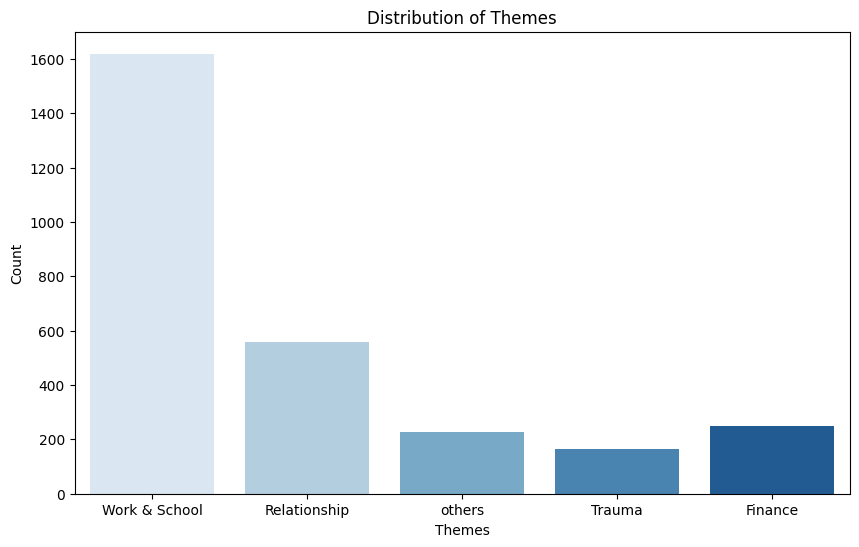

In [16]:
# Create themes/topics based on the topic modeling results
themes = {
    'Work & School': topic_table['Top_Words'][0].split(', ')+['work', 'job', 'career', 'boss', 'colleague'],
    'Relationship': topic_table['Top_Words'][1].split(', ')+['relationship', 'partner', 'boyfriend', 'girlfriend'],
    'Finance': topic_table['Top_Words'][2].split(', ')+['money', 'finance', 'debt', 'loan', 'bill', 'pay'],
    'Trauma': topic_table['Top_Words'][3].split(', ')+['abuse', 'violence', 'trauma', 'ptsd', 'survivor', 'hit'],
}
    
def assign_theme(text):
    for theme, keywords in themes.items():
        if any(keyword in text for keyword in keywords):
            return theme
    return "others"

df['theme'] = df['tokens'].apply(lambda x: assign_theme(x))

# plot the distribution of themes
theme_counts = dict(Counter(df['theme']))

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=list(theme_counts.keys()), y=list(theme_counts.values()), palette='Blues')
plt.xlabel("Themes")
plt.ylabel("Count")
plt.title("Distribution of Themes")
plt.show()

### Step 5: Summary
This is the final step of the process.

In [17]:
# Print the summary statistics of the themes
print(f"Total number of posts: {len(df)}")
print(f"The top sources of human stress and mental health issues are: {df['theme'].value_counts().index[0]} and {df['theme'].value_counts().index[1]}")

Total number of posts: 2819
The top sources of human stress and mental health issues are: Work & School and Relationship


In [18]:
clear_output = df[['post_id', 'text', 'theme']]
clear_output.to_excel('mental_health.xlsx', index=False)